In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [21]:
cd '/content/drive/My Drive/PLANT DISEASE RECOGNITION'

/content/drive/My Drive/PLANT DISEASE RECOGNITION


In [17]:
!mkdir config datasets models

mkdir: cannot create directory ‘play’: File exists


In [22]:
cd config

/content/drive/My Drive/PLANT DISEASE RECOGNITION/config


In [23]:
# from google.colab import files
# files.upload()

In [ ]:
cd '/content/drive/My Drive/PLANT DISEASE RECOGNITION/datasets'

/content/drive/My Drive/PLANT DISEASE RECOGNITION/datasets


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/PLANT DISEASE RECOGNITION/config"

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [00:28<00:00, 8.88MB/s]
100% 2.70G/2.70G [00:29<00:00, 99.6MB/s]


In [ ]:
!ls

new-plant-diseases-dataset.zip


In [ ]:
#Unzipping the zip files to extract the dataset folder and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533_180deg.JPG  
  inflating: new plant diseases dataset(augmented)/New

In [ ]:
for (root,dirs,files) in os.walk('.', topdown = True):
  print(root, dirs)

. ['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
./New Plant Diseases Dataset(Augmented) ['New Plant Diseases Dataset(Augmented)']
./New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented) ['train', 'valid']
./New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato_

In [ ]:
base_dir = './New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
os.listdir(base_dir)

['train', 'valid']

In [ ]:
len(os.listdir(os.path.join(base_dir, 'train')))

38

## Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL
import tensorflow as tf
from tensorflow.python import keras
import warnings 
import argparse
warnings.filterwarnings('ignore')
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

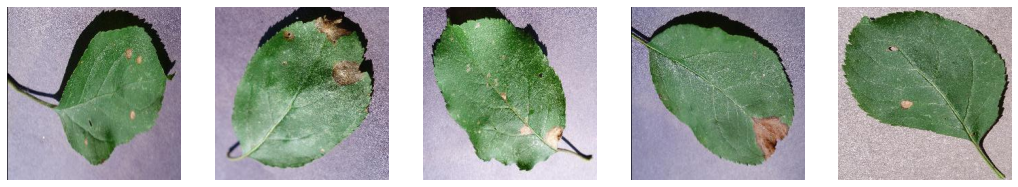

In [ ]:
fig,axes = plt.subplots(1,5, figsize=(18,18))
images = os.listdir(os.path.join(base_dir, 'train/Apple___Black_rot'))
for _ in range(5):
  ax = axes[_]
  image_path = base_dir+'/train/Apple___Black_rot/'+images[_]
  img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
  ax.imshow(img)
  ax.axis('off')
plt.show()

## Data Augmentation transformations for the train dataset

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

# Data augmentation for validation dataset
validation_datagen = ImageDataGenerator(rescale = 1./255)

## Loading the images from their directories

In [ ]:
BATCH_SIZE = 32

train_set_from_dir = train_datagen.flow_from_directory(os.path.join(base_dir, 'train'),
                                                       target_size = (224,224),
                                                       batch_size = BATCH_SIZE,
                                                       class_mode = 'categorical'
                                                       )

validation_set_from_dir = validation_datagen.flow_from_directory(os.path.join(base_dir, 'valid'),
                                                                 target_size = (224,224),
                                                                 batch_size = BATCH_SIZE,
                                                                 class_mode = 'categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
classes_dict = train_set_from_dir.class_indices

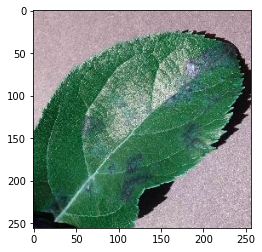

In [ ]:
img = train_set_from_dir.filepaths[np.random.random_integers(low=0, high=train_set_from_dir.samples)]
img = cv2.imread(img)
plt.imshow(img)

In [ ]:
import json
with open('/content/drive/My Drive/PLANT DISEASE RECOGNITION/class_indices.json','w') as f:
  json.dump(classes_dict, f)

### Transfer learning with MobileNet architecture

In [ ]:
# Importing the required libraries for modelling 
from keras import Input, Model
from keras.applications import MobileNet
from keras.layers.core import Flatten, Dense,Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Model, model_from_json
from keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score

Using TensorFlow backend.


In [ ]:
base_model = MobileNet(
    #Load weights into the pre-trained MobileNet model
    weights="imagenet",
    input_shape=(224, 224, 3),
    #Exclude the ImageNet classifier at the top of the model
    include_top=False
)  

17227776/17225924 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
head_model = base_model.output
head_model = GlobalAveragePooling2D()(head_model)
# Regularization by applying DropOut
head_model = Dropout(0.2)(head_model)
outputs = Dense(38, activation="softmax")(head_model)
mobilenet_model = Model(base_model.input, outputs, name='pretrained_mobilenet' )

for layer in mobilenet_model.layers:
    layer.trainable = False

# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
# Compiling the model with the optimizer and loss function 

mobilenet_model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [ ]:
mobilenet_model.summary()
for idx, layer in enumerate(mobilenet_model.layers):
    print(idx, layer.name, layer.trainable)

Model: "pretrained_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 

In [ ]:
## Setting up callbacks for our model

callbacks = [
           ModelCheckpoint('content/drive/My Drive/PLANT DISEASE RECOGNITION/checkpoints/mobilenet_plantdiseases.h5', save_best_only=True, monitor='val_acc'),
           EarlyStopping(monitor='val_loss', patience=2, verbose=1),
           ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1) 
]

In [ ]:
N_EPOCHS = 10

history = mobilenet_model.fit(train_set_from_dir,
          validation_data = validation_set_from_dir,
          epochs = N_EPOCHS,
          # Use 128 random batches for training set 
          steps_per_epoch = 128, # 128 x 32 = 2**12 random samples
          # Use 64 random batches for training validation set
          validation_steps = 100, # 100 x 32 = 3200 random samples 
          callbacks = callbacks
          )

Epoch 1/10
128/128 [==============================] - 2093s 16s/step - loss: 0.9028 - accuracy: 0.7339 - val_loss: 1.9841 - val_accuracy: 0.5453
Epoch 2/10
128/128 [==============================] - 2016s 16s/step - loss: 0.4206 - accuracy: 0.8665 - val_loss: 1.0434 - val_accuracy: 0.7625
Epoch 3/10
128/128 [==============================] - 2076s 16s/step - loss: 0.3397 - accuracy: 0.8889 - val_loss: 1.0309 - val_accuracy: 0.7500
Epoch 4/10
128/128 [==============================] - 2086s 16s/step - loss: 0.3306 - accuracy: 0.8989 - val_loss: 0.3391 - val_accuracy: 0.8516
Epoch 5/10
128/128 [==============================] - 2177s 17s/step - loss: 0.2889 - accuracy: 0.9045 - val_loss: 0.5909 - val_accuracy: 0.8194
Epoch 6/10
128/128 [==============================] - 1587s 12s/step - loss: 0.2468 - accuracy: 0.9234 - val_loss: 0.5936 - val_accuracy: 0.8581
Epoch 00006: early stopping


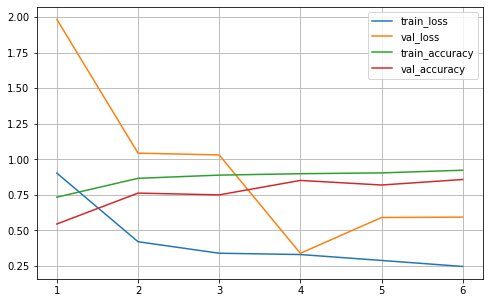

In [ ]:
n = 6
plt.figure(figsize = (8,5))
plt.plot(np.arange(1,n+1), history.history['loss'], label = 'train_loss')
plt.plot(np.arange(1,n+1), history.history['val_loss'], label = 'val_loss')
plt.plot(np.arange(1,n+1), history.history['accuracy'], label = 'train_accuracy')
plt.plot(np.arange(1,n+1), history.history['val_accuracy'], label = 'val_accuracy')

plt.grid(True)
plt.legend(loc = "best")
plt.savefig('/content/drive/My Drive/PLANT DISEASE RECOGNITION/performance.jpg')
plt.show()

In [ ]:
# Evaluate the model on the Validation dataset
results = mobilenet_model.evaluate(validation_set_from_dir)

550/550 [==============================] - 59s 107ms/step


In [ ]:
print("Validation Loss :-", results[0])
print("="*30)
print("Validation Accuracy :-", results[1])

Validation Loss :- 0.014583874493837357
Validation Accuracy :- 0.8529478907585144


In [ ]:
cd '/content/drive/My Drive/PLANT DISEASE RECOGNITION'

/content/drive/My Drive/PLANT DISEASE RECOGNITION


In [ ]:
mkdir models

In [ ]:
# Save model in HDF5 format
mobilenet_model.save('models/mobilenet_model.h5')

In [ ]:
# Testing on a random image from the test images directory
from PIL import Image
np.random.seed(200)
idx = np.random.randint(30)
test_images_dir = os.path.join('datasets/test', 'test')
test1 = Image.open(os.path.join(test_images_dir, os.listdir(test_images_dir)[idx]))

26


26


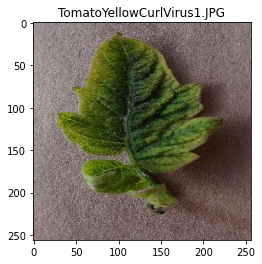

In [ ]:
plt.imshow(test1)
plt.title(os.listdir(test_images_dir)[idx])

In [ ]:
test1 = test1.resize((224,224))
test1_scaled = np.expand_dims(np.asarray(test1), axis = 0) / 255
predictions = mobilenet_model.predict(test1_scaled)
print(predictions)

[[3.2511131e-12 2.0627213e-12 1.0672722e-08 7.4512084e-11 9.7505737e-10
  2.5782879e-07 3.5203795e-11 7.8878709e-10 3.4717043e-10 1.1837048e-10
  1.6650042e-11 1.1119714e-09 3.0714025e-07 8.4619423e-08 2.6696884e-10
  4.2097961e-09 1.6930435e-12 7.7451039e-11 8.5175400e-10 3.9144616e-12
  4.2878266e-13 1.6123290e-10 3.3550971e-11 2.9634718e-08 7.4205871e-11
  9.7984865e-10 7.2316797e-10 1.9204359e-08 3.5286668e-08 7.3232462e-07
  1.6105752e-05 1.7480016e-06 1.6131581e-08 3.9582712e-08 2.0550729e-07
  9.9997985e-01 5.7835371e-07 5.9569259e-11]]


In [ ]:
classes_dict = train_set_from_dir.class_indices
classes_dict = { v:k for (k,v) in classes_dict.items() }
classes_dict[np.argmax(predictions)]

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

#### Accurate !

# Converting model to Tensorflow js

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 92kB 7.2MB/s 
     |████████████████████████████████| 137.3MB 112kB/s 
     |████████████████████████████████| 256kB 55.3MB/s 
     |████████████████████████████████| 921kB 52.7MB/s 
     |████████████████████████████████| 6.8MB 55.3MB/s 
     |████████████████████████████████| 460kB 56.4MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=df537e95cd58b576c4d3c33548eeae21fa4b96b88d31d84458a21ff3b6419135
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.3.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium=

In [ ]:
!pwd

/content/drive/My Drive/PLANT DISEASE RECOGNITION


In [ ]:
!mkdir tensorflowjs-model

In [ ]:
!tensorflowjs_converter --input_format keras models/mobilenet_model.h5 tensorflowjs-model/

In [ ]:
!zip -r tensorflowjs-model.zip tensorflowjs-model

  adding: tensorflowjs-model/ (stored 0%)
  adding: tensorflowjs-model/group1-shard1of4.bin (deflated 7%)
  adding: tensorflowjs-model/group1-shard2of4.bin (deflated 7%)
  adding: tensorflowjs-model/group1-shard3of4.bin (deflated 7%)
  adding: tensorflowjs-model/group1-shard4of4.bin (deflated 7%)
  adding: tensorflowjs-model/model.json (deflated 95%)


## And we are done !